### Assignment 1

In [241]:
import sys
!{sys.executable} -m pip install numpy
import os
print("Current working directory: ", os.getcwd())
import matplotlib.pyplot as plt

Current working directory:  /home/hp/Documents/IML/IML_2022


In [242]:
# Import the necessary libraries/packages here
import numpy as np
# import math

### Helpful Notes:
1. Dataset 1: a linearly separable dataset where you can test the correctness of your base learner and boosting algorithms
   
   300 samples 2 features
   
   ![dataset1.png](./dataset1.png)
   
   Generally speaking, your learners shall 100% correctly classify the data in dataset 1.

2. Dataset 2 ~ 4 : non-linearly separable cases, applying descent boosting techniques can be beneficial
   
   Dataset 2: 300 samples 2 features. In comparison to the performance of your single base learner, does your boosting algorithm perferm better?
      
   ![dataset2.png](./dataset2.png)
      
   Dataset 3: 400 samples 2 features (challenging)

      A good classifier shall obtain a ellipse-like decision boundary on this dataset. Can your algorithms handle this dataset? If not, can you try to give reasonable explanations?

   ![dataset3.png](./dataset3.png)

   Dataset 4: 3000 samples 10 features (more challenging)
   
      This is more or less the higher dimensional version of dataset3. We visualize the first two features of dataset 3, As it is shown in the following figure, they are non-linearly separable. 
      
      How do your algorithms perform?

   ![dataset4.png](./dataset4.png)

   
3. The data is also provided in csv format:
   1. Feature columns and a label column 
   
HINTs: 
1. Split the data into two parts (i.e., training data and test data).
2. Draw decision boundary (surface) of your classifiers (on dataset 1 & 2) can be helpful.
3. Carefully design your experiments so that you can understand the influence of increasing or decreasing some parameters (e.g., learning rate, number of base learners in boosting Alg.)
4. Make smart implementations (e.g., vectorization using numpy to avoid some nested-loops in python), so that you can efficiently run more experiments
5. The performance of your classifiers is not of high priority in this assignment.
   1. The datasets are all artificially generated (toy) data, in principle, there is no need to preprocess the data.
   2. Constructive discussions on your findings are more important. If the results are not good, try to find out the reasons.
   3. We hope this assignment can help you fill in the gap between theory and application.
6. You are encouraged to implement not only Adaboost but also other boosting algorithms of your choice.

### Skeleton codes:
You should follow the structure of this code:

In [490]:
class Perceptron:
    # Implement your base learner here
    def __init__(self, learning_rate, max_iter, **kwargs):
        """ Initialize the parameters here 
        Args:
            learning_rate (float or a collection of floats): your learning rate
            max_iter (int): the maximum number of training iterations
            Other parameters of your choice

        Examples ToDos:
        self.learning_rate = learning_rate
        self.max_iter = max_iter

        Try different initialization strategies (as required in Question 2.3)
        """
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.w = 0
        pass

    def fit(self, X, y, set_weight_zero = True):
        """ Implement the training strategy here
        Args:
            X (Numpy.ndarray, list, etc.): The training data
            y (Numpy.ndarray, list, etc.): The labels
            set_weight_zero (Boolean)

        Example ToDos:
        # for _ in range(self.max_iter):
        #     Update the parameters of Perceptron according to the learning rate (self.learning_rate) and data (X, y)
        """ 
        if set_weight_zero:
            self.w = np.zeros(X.shape[1])
        else:
            self.w = np.random.rand(X.shape[1])
            
        for t in range(self.max_iter):
            for i, x in enumerate(X):
                if (np.dot(X[i], self.w)*y[i]) <= 0:
                    self.w = self.w + self.learning_rate*X[i]*y[i]
                    ## decrease the learning rate over time
                    self.learning_rate = self.learning_rate*0.95

        

        

    def predict(self, x, **kwargs) -> np.ndarray:
        """ Implement the prediction strategy here
        Args:
            x (Numpy.ndarray, list, Numpy.array, etc.): The input data
            Other parameters of your choice
        Return(s):
            The prediction value(s), namely, class label(s), others of your choice
        """ 

        return np.sign(np.dot(x,self.w)).astype(int)

In [534]:
from math import log, e


class BoostingAlgorithm:
    # Implement your boosting algorithm here
    def __init__(self, n_estimators, max_iter, lr, **kwargs):
        """ Initialize the parameters here 
        Args:
            n_estimators (int): number of base perceptron models
            Other parameters of your choice
        
        Think smartly on how to utilize multiple perceptron models
        """
        self.lr = lr
        self.max_iter = max_iter
        self.n_estimators = n_estimators
        self.trees = []
        self.importance = []
        self.predictlist = []
        self.score_list = []
        pass

    def fit(self, X, y, set_weight_zero = True):
        """ Implement the training strategy here
        Args:
            X (Numpy.ndarray, list, etc.): The training data
            y (Numpy.ndarray, list, etc.): The labels
            Other parameters of your choice
        """ 
        #initial weight per sample: 1/n
        self.w = np.ones(X.shape[0])/X.shape[0]
        error = 1
        
        for i in range(self.n_estimators):
            
            #base learner
            baselearner = Perceptron(self.lr, self.max_iter)
            baselearner.fit(X,y,set_weight_zero = set_weight_zero)
            ypred = np.sign(baselearner.predict(X)).astype(int)
            self.trees.append(baselearner)
            
            if np.sum(np.not_equal(y, ypred).astype(int))>0:
                
                ##total error: sum of the weights of incorrect predictions
                error = np.sum(self.w*np.not_equal(y, ypred).astype(int))
#                 print(f"error is {error:.2f}")
                alpha = 0.5*np.log((1-error)/(error))
#                 print(f"alpha is {alpha:.2f}")
                ##update weight
                self.w = self.w*e**(-alpha*np.sign(y*ypred).astype(int))
                ##normalize weight
                self.w = self.w/np.sum(self.w)
                score = 1-(np.sum(np.not_equal(ypred, y).astype(int))/len(ypred))
                self.importance.append(alpha)
                self.score_list.append(score)
#                
            else:
                self.n_estimators = i+1
                alpha = 1
                error = 0 
                self.importance.append(alpha)
                score = 1-(np.sum(np.not_equal(ypred, y).astype(int))/len(ypred))
                self.score_list.append(score)
        
        return self.score_list
    
                

                
                                    
    def predict(self, x, **kwargs):
        """ Implement the prediction strategy here
        Args:
            x (Numpy.ndarray, list, Numpy.array, etc.): The input data
            Other parameters of your choice
        Return(s):
            The prediction value, namely, class label(s)
        """ 
        for i in range(self.n_estimators):
            y_predict = self.trees[i].predict(x) * self.importance[i]
            self.predictlist.append(y_predict)
            
        
        y_predict = np.sign(np.sum(self.predictlist,0)).astype(int)
        
        return y_predict
    
  

In [610]:
""" Load the dataset
Dataset (Numpy npz file)
|- features (Numpy.ndarray)
|- labels (Numpy.ndarray)

The data is also provided in csv format.
"""

def load_data(file_name):
    """ Load the Numpy npz format dataset 
    Args:
        file_name (string): name and path to the dataset (dataset1.npz, dataset2.npz, dataset3.npz)
    Returns:
        X (Numpy.ndarray): features
        y (Numpy.ndarray): 1D labels
    """
    import numpy as np
    data = np.load(file_name)
    X, y = data['features'], data['labels']
    
    
    return X, y



def splitdata(X, y, train_size = 0.8):
    
    index = np.random.permutation(len(y))
    train_index, test_index = index[:int(len(y)*train_size)], index[int(len(y)*train_size):]
    
    X_train = X[train_index]
    X_test = X[test_index]
    
    y_train = y[train_index]
    y_test = y[test_index]
    
    return X_train, y_train, X_test, y_test
    


def run(dataset,classifier, lr = 0.06, max_iter = 3, set_weight_zero = True
        , n_esti = 40, linear = False, train_size = 0.8):
    """ Single run of your classifier
    """
    # Load the data
    X, y = load_data(f'./dataset{dataset}.npz')
    # split the data into training and test sets
    X_train, y_train, X_test, y_test = splitdata(X, y, train_size = train_size)
    
    
    # sqaure the data
    if dataset == 3 and linear == True:
        #print(1)
        # if linear is true then we process the data as linear seperable
        X_train_s = X_train**2-np.mean(X**2)
        X_test_s = X_test**2-np.mean(X**2)
    
    elif dataset == 4 and linear == True:
        #print(1)
        # if linear is true then we process the data as linear seperable
        X_train_s = X_train**2-np.mean(X**2)
        X_test_s = X_test**2-np.mean(X**2)
        
    else:
        X_train_s = X_train
        X_test_s = X_test
    
    
    # print(np.shape(X_train))
    # Train the classifier
    # Initialize the classifier
    if classifier == Perceptron:
        base = classifier(lr, max_iter)
        base.fit(X_train_s, y_train, set_weight_zero = set_weight_zero)
    else:
        base = classifier(n_esti, max_iter, lr)
        importance = base.fit(X_train_s, y_train, set_weight_zero = set_weight_zero)
    
   
    # Test and score the learners using the test data
    y_pred = base.predict(X_test_s)
    score = 1-(np.sum(np.not_equal(y_pred, y_test).astype(int))/len(y_pred))
    #print(f"The score is {score:.2f}")
    
#     plt.figure(figsize = (15,10))
    
#     X_p = X_test[y_pred>0]
#     X_n = X_test[y_pred<0]

#     plt.scatter(X_p[:,0],X_p[:,1],label = "1")
#     plt.scatter(X_n[:,0],X_n[:,1],label = "-1")

#     plt.legend()
    if classifier == Perceptron:
        return score
    else:
        return score, importance


# Make plots for experiments with different number of iteration

1
2
3
4
3
0.9375
0.8625
0.875
0.825
0.9
0.9125
0.875
0.8875
0.9125
0.825
0.9
0.7875
0.8625
0.85
0.9125
0.8875
0.85
0.875
0.8625
0.9375
0.9125
0.9
0.925
0.8875
0.85
0.875
0.8
0.85
0.8625
0.85
0.8625
0.8125
0.9
0.875
0.875
0.9
0.875
0.85
0.9125
0.875
0.8875
0.925
0.8625
0.9125
0.9125
0.825
0.8875
0.8875
0.8625
0.925
0.9125
0.875
0.9125
0.875
0.875
0.85
0.875
0.875
0.8375
0.925
0.925
0.9125
0.8375
0.8875
0.8625
0.925
0.8625
0.9125
0.875
0.925
0.9125
0.8375
0.8875
0.8375
0.875
0.875
0.875
0.9
0.925
0.8625
0.8625
0.8875
0.9375
0.9375
0.8875
0.875
0.8875
0.85
0.9125
0.9125
0.9
0.8625
0.85
0.875
0.85
0.8625
0.9375
0.85
0.85
0.9125
0.8625
0.8875
0.9
0.9375
0.85
0.925
0.875
0.9125
0.8375
0.9125
0.9
0.9125
0.85
0.875
0.8375
0.8875
0.8625
0.9
0.8875
0.9375
0.8625
0.8625
0.9
0.8875
0.95
0.8875
0.875
0.8625
0.85
0.8625
0.9625
0.85
0.8375
0.825
0.775
0.925
0.8875
0.8
0.9
0.9125
0.925
0.8875
0.8875
0.875
0.8375
0.8625
0.875
0.85
0.85
0.9125
0.875
0.9
0.8875
0.9
0.8375
0.85
0.875
0.8375
0.925
0.8625
0

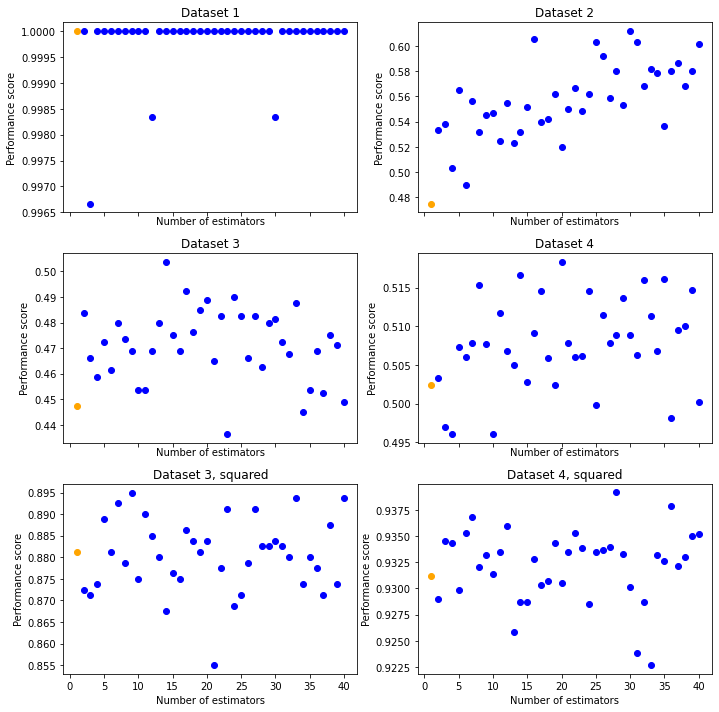

In [611]:
fig, axs = plt.subplots(3,2, sharex= True, sharey = False)
plt.rcParams['figure.figsize'] = [10,10]
number_estimators = 40
print(1)
for i in range (number_estimators):
    scorelist = []
    for j in range (10):
        score = run(1, BoostingAlgorithm, n_esti = (i+1), set_weight_zero = False)[0]
        scorelist.append(score)
    #print (np.mean(scorelist))
    if i == 0:
        axs[0,0].scatter(1,np.mean(scorelist), c = "orange")
    else:
        axs[0,0].scatter(i+1,np.mean(scorelist), c = "blue")
    

print(2)    
for i in range (number_estimators):
    scorelist = []
    for j in range (10):
        score = run(2, BoostingAlgorithm, n_esti = (i+1), set_weight_zero = False)[0]
        scorelist.append(score)
    if i == 0:
        axs[0,1].scatter(1,np.mean(scorelist), c = "orange")
    else:
        axs[0,1].scatter(i+1,np.mean(scorelist), c = "blue")

print (3)    
for i in range (number_estimators):
    scorelist = []
    for j in range (10):
        score = run(3, BoostingAlgorithm, n_esti = (i+1), set_weight_zero = False)[0]
        scorelist.append(score)
    if i == 0:
        axs[1,0].scatter(1,np.mean(scorelist), c = "orange")
    else:
        axs[1,0].scatter(i+1,np.mean(scorelist), c = "blue")

print (4)
for i in range (number_estimators):
    scorelist = []
    for j in range (10):
        score = run(4, BoostingAlgorithm, n_esti = (i+1), set_weight_zero = False)[0]
        scorelist.append(score)
    if i == 0:
        axs[1,1].scatter(1,np.mean(scorelist), c = "orange")
    else:
        axs[1,1].scatter(i+1,np.mean(scorelist), c = "blue")
    
print (3)    
for i in range (number_estimators):
    scorelist = []
    for j in range (10):
        score = run(3, BoostingAlgorithm, n_esti = (i+1), linear = True, set_weight_zero = False)[0]
        scorelist.append(score)
        print (score)
    
    if i == 0:
        axs[2,0].scatter(1,np.mean(scorelist), c = "orange")
    else:
        axs[2,0].scatter(i+1,np.mean(scorelist), c = "blue")

print (4)
for i in range (number_estimators):
    scorelist = []
    for j in range (10):
        score = run(4, BoostingAlgorithm, n_esti = (i+1), linear = True, set_weight_zero = False)[0]
        scorelist.append(score)
    if i == 0:
        axs[2,1].scatter(1,np.mean(scorelist), c = "orange")
    else:
        axs[2,1].scatter(i+1,np.mean(scorelist), c = "blue")
    
axs[0,0].set(xlabel = "Number of estimators", ylabel = "Performance score")
axs[0,1].set(xlabel = "Number of estimators", ylabel = "Performance score")
axs[1,0].set(xlabel = "Number of estimators", ylabel = "Performance score")
axs[1,1].set(xlabel = "Number of estimators", ylabel = "Performance score")
axs[2,0].set(xlabel = "Number of estimators", ylabel = "Performance score")
axs[2,1].set(xlabel = "Number of estimators", ylabel = "Performance score")
axs[0,0].set_title("Dataset 1")
axs[0,1].set_title("Dataset 2")
axs[1,0].set_title("Dataset 3")
axs[1,1].set_title("Dataset 4")
axs[2,0].set_title("Dataset 3, squared")
axs[2,1].set_title("Dataset 4, squared")
plt.tight_layout()
plt.savefig("performance_classifier_line.pdf")

# Make plots for learning rate and initial weight experiments

100
100
100
100


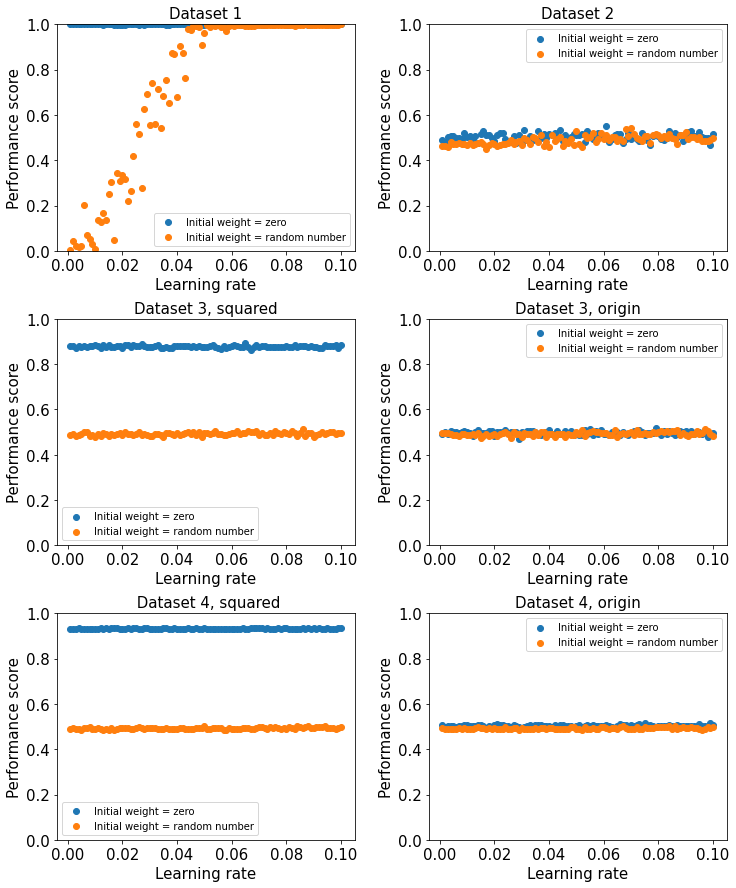

In [330]:
lr = np.linspace(0.001, 0.1, 100)
fig, ax = plt.subplots(3,2,figsize = (12,15))
title_list = ["Dataset 1", "Dataset 2", "Dataset 3, squared", 
              "Dataset 3, origin", " Dataset 4, squared", "Dataset 4, origin"]
ax = np.array(ax).flatten()
ax_inx = 0
for dataset in range(4):
    
    if dataset > 1:
        #experiment with and without linear dataset 3 and 4.
        linear = [True, False]
        for k in linear:
            score_mean_lr_random = []
            score_mean_lr_zero= []
            for j in (lr):
                score_lr = []
                for i in range (10):
                    score = run(dataset+1, Perceptron, lr = j, set_weight_zero = True, max_iter = 5, linear = k)
                    score_lr.append(score)
                score_mean_lr_zero.append(np.mean(score_lr))

            for k in (lr):
                score_lr = []
                for i in range (10):
                    score = run(dataset+1, Perceptron, lr = k, set_weight_zero = False, max_iter = 5, linear = k)
                    score_lr.append(score)
                score_mean_lr_random.append(np.mean(score_lr))
            ax[ax_inx].scatter(lr, score_mean_lr_zero, label = "Initial weight = zero")
            ax[ax_inx].scatter(lr, score_mean_lr_random, label = "Initial weight = random number")
            ax[ax_inx].set_title(title_list[ax_inx], fontsize = 15)
            ax[ax_inx].set_ylabel("Performance score", fontsize = 15)
            ax[ax_inx].set_xlabel("Learning rate", fontsize = 15)
            ax[ax_inx].tick_params(axis='y', labelsize=15)
            ax[ax_inx].tick_params(axis='x', labelsize=15)
            ax[ax_inx].set_ylim(0,1)
            ax[ax_inx].legend()
            ax_inx += 1
                       
    else:
        score_mean_lr_random = []
        score_mean_lr_zero= []
        for j in (lr):
            score_lr = []
            for i in range (10):
                score = run(dataset+1, Perceptron, lr = j, set_weight_zero = True, max_iter = 5)
                score_lr.append(score)
            score_mean_lr_zero.append(np.mean(score_lr))
            #print(len(score_mean_lr_random))

        for k in (lr):
            score_lr = []
            for i in range (10):
                score = run(dataset+1, Perceptron, lr = k, set_weight_zero = False, max_iter = 5)
                score_lr.append(score)
            score_mean_lr_random.append(np.mean(score_lr))
        print(len(lr))
        print(len(score_mean_lr_zero))
        ax[ax_inx].scatter(lr, score_mean_lr_zero, label = "Initial weight = zero")
        ax[ax_inx].scatter(lr, score_mean_lr_random, label = "Initial weight = random number")
        ax[ax_inx].set_title(title_list[ax_inx], fontsize = 15)
        ax[ax_inx].set_ylabel("Performance score",fontsize = 15)
        ax[ax_inx].set_xlabel("Learning rate", fontsize = 15)
        ax[ax_inx].tick_params(axis='y', labelsize=15)
        ax[ax_inx].tick_params(axis='x', labelsize=15)
        ax[ax_inx].set_ylim(0,1)
        ax[ax_inx].legend()
        ax_inx += 1
                       

plt.subplots_adjust(wspace=.25, hspace=.3)
plt.savefig("learning_rate_weight_ini_ylim.pdf", bbox_inches='tight')
plt.show()


# Make plot for the sample distribution of adaboost

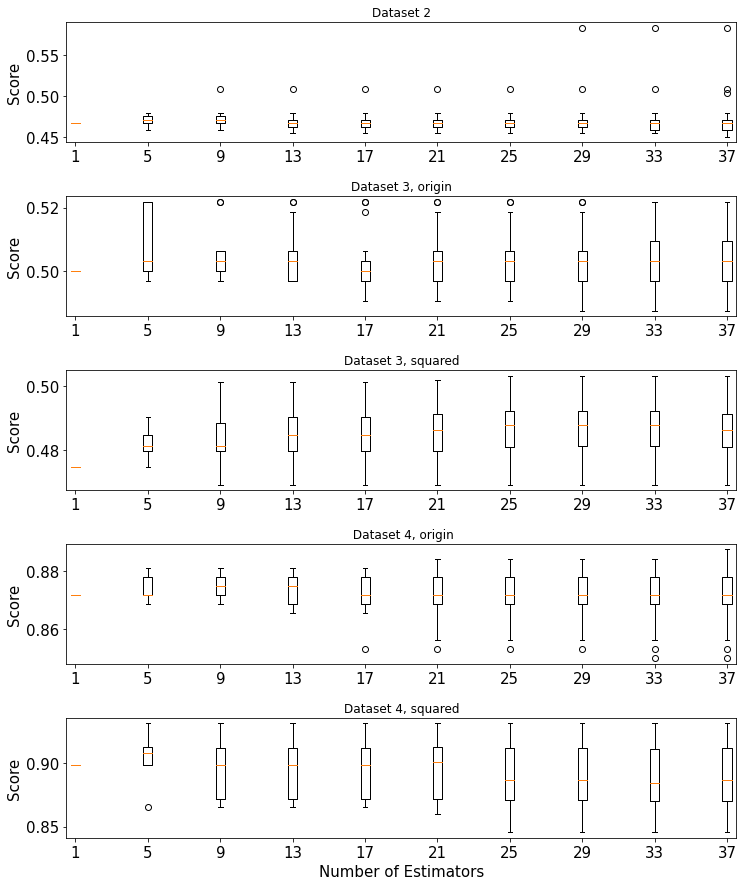

In [605]:
def sample_dis(dataset, ax, linear = False, x = True, y = True):
    score, importance = run(dataset,BoostingAlgorithm , lr = 0.01, set_weight_zero = False, max_iter = 5, 
                     linear = linear, n_esti = 41)

    importance_list = []
    for i in  np.arange(1,41, 4):
        # Creating plot
        importance_list.append(importance[:i])
        # show plot
    ax.boxplot(importance_list, positions = np.arange(1,41,4))
    ax.set_ylabel("Score", fontsize = 15)
    ax.tick_params(axis='y', labelsize=15)
    ax.tick_params(axis='x', labelsize=15)
    if x == False:
        ax.set_xticklabels([])
    if y == False:
        ax.set_yticklabels([])

lr = np.linspace(0.001, 0.1, 100)
fig, ax = plt.subplots(5,1,figsize = (12,15))
title_list = [ "Dataset 2", "Dataset 3, origin", 
              "Dataset 3, squared", " Dataset 4, origin", "Dataset 4, squared"]
ax = np.array(ax).flatten()
ax_inx = 2

for ax in ax:
    if ax_inx > 4:
        sample_dis(ax_inx-2, ax, linear = True)
    else:
        sample_dis(ax_inx, ax)
#     if ax_inx = 4 or 6:
#         ax.set_yticklabels([])
    if ax_inx == 6:
        ax.set_xlabel("Number of Estimators", fontsize = 15)
        
    ax_inx += 1
    ax.set_title(title_list[ax_inx-3], fontsize = 12)

plt.subplots_adjust(hspace=.45)
plt.savefig("distribution_2.pdf", bbox_inches='tight')
plt.show()

Good luck with the assignment